# **Project Name**    - Yes Bank Stock Closing Price Prediction by Regression.


# **Project Summary -**

Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.

# **GitHub Link -**

link as to update here

# **Problem Statement**


The problem statement for developing a Yes Bank stock closing price prediction ML model is to create an accurate and reliable forecasting model. The goal is to provide investors with a tool that can assist them in making informed decisions Yes Bank stocks. The model should be trained on a subset of historical data and validated on another subset to ensure that it can accurately predict future stock prices. The ultimate objective is to create a robust and accurate model that can help investors make informed decisions and maximize their returns on investments in Yes Bank stocks.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

import datetime

### Dataset Loading

In [2]:
# Load Dataset
data=pd.read_csv("/content/data_YesBank_StockPrices.csv")

### Dataset View

In [3]:
# Dataset First Look
data.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


In [4]:
# Dataset Rows & Columns count
data.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
len(data[data.duplicated()])

0

#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
data.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


### What did you know about your dataset?

According to the analysis above, the dataset comprises 5 columns and 185 rows. where just one column is in float format and the others are formatted as dates. This data does not contain any Null values or duplicate rows.

## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [9]:
# Dataset Describe
data.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description

There are 5 variable in data as follows

**Independent Variable**

1. Date : It has Month and Year.
2. Open : Opening stock price for respective Month.
3. High : Highest stock price for respective Month.
4. Low : Lowest stock price for respective Month.

**Dependent Variable**
5. Close : Closing price of Stock for respective Month

## 3. ***Data Wrangling***

### Data Wrangling Code

In [10]:
# Converting Date column from object format to Date
data["Date"]=pd.to_datetime(data["Date"],format='%b-%y')

In [11]:
data['Date']

,Date
0,2005-07-01
1,2005-08-01
2,2005-09-01
3,2005-10-01
4,2005-11-01
...,...
180,2020-07-01
181,2020-08-01
182,2020-09-01
183,2020-10-01


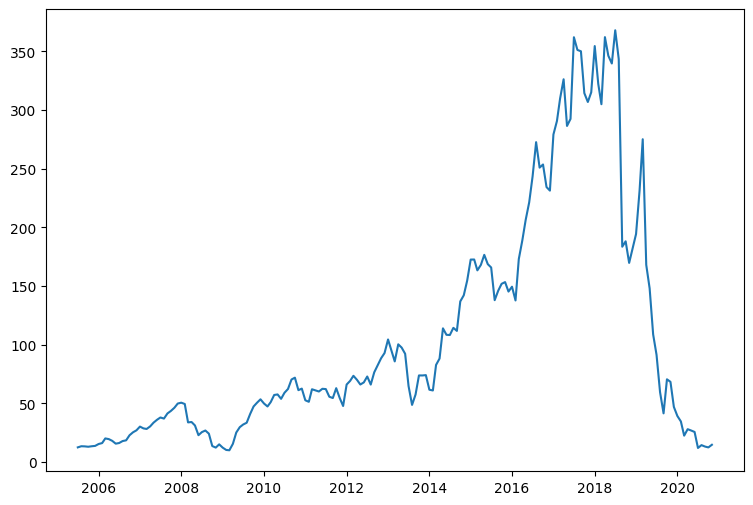

In [12]:
plt.figure(figsize=(9,6))
plt.plot(data['Date'],data['Close'])

In [13]:
# Taking a Numerical Feature from Data
numeric_feature=data.describe().columns
numeric_feature

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

### What all manipulations have you done and insights you found?

Converted Date column to Date Format by using Datetime Library. To get better visualisation about Date and Closing price of Stock.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

<Axes: xlabel='Close', ylabel='Density'>

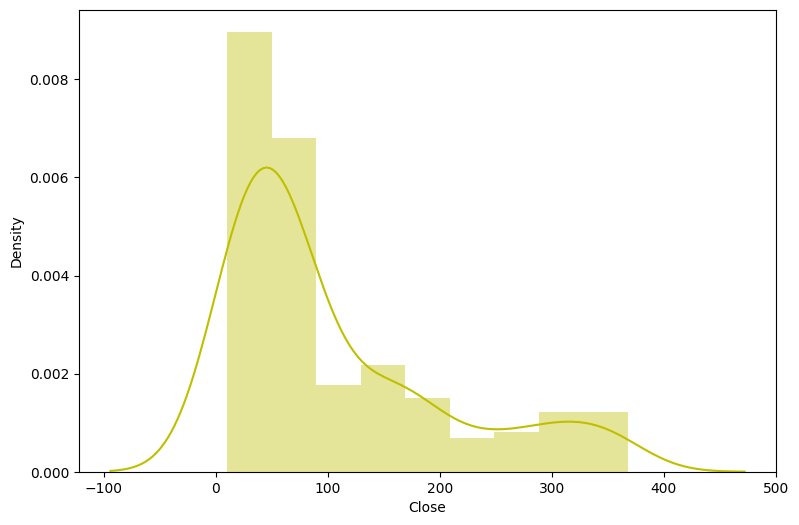

In [14]:
# Chart - 1 visualization code
# Doing Visualisation of Distributed Data for Close column.
plt.figure(figsize=(9,6))
sns.distplot(data['Close'],color='y')

<Axes: xlabel='Close', ylabel='Density'>

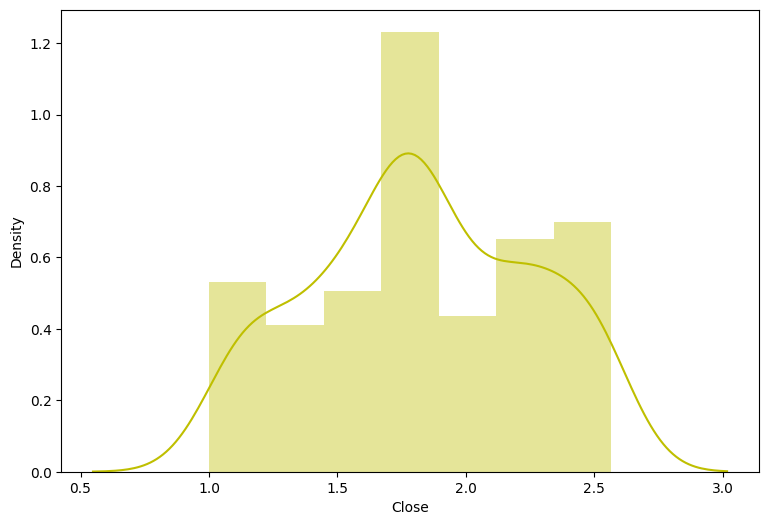

In [15]:
# Normalizing the close column data by using log transformation.
plt.figure(figsize=(9,6))
sns.distplot(np.log10(data["Close"]),color='y')

A distribution plot of the target variable (Yes Bank stock closing price) helps understand its central tendency, spread, skewness, and potential outliers. This insight is valuable for selecting the right machine learning algorithm and addressing any data issues, such as non-normality or extreme values, before model training.

The distribution plot of Yes Bank's stock closing price reveals a right-skewed (positively skewed) distribution, indicating that the prices are concentrated on one side of the mean. To improve model performance, a log transformation may be needed to make the distribution more symmetrical. Additionally, the plot helps identify potential outliers that should be addressed before model training.

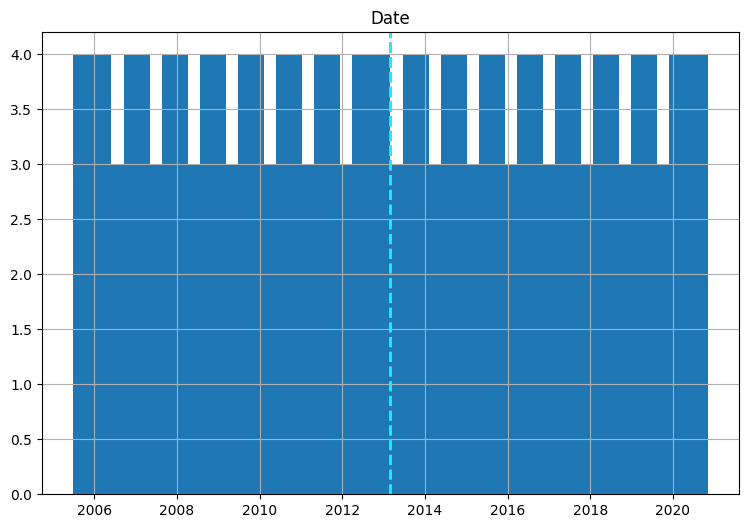

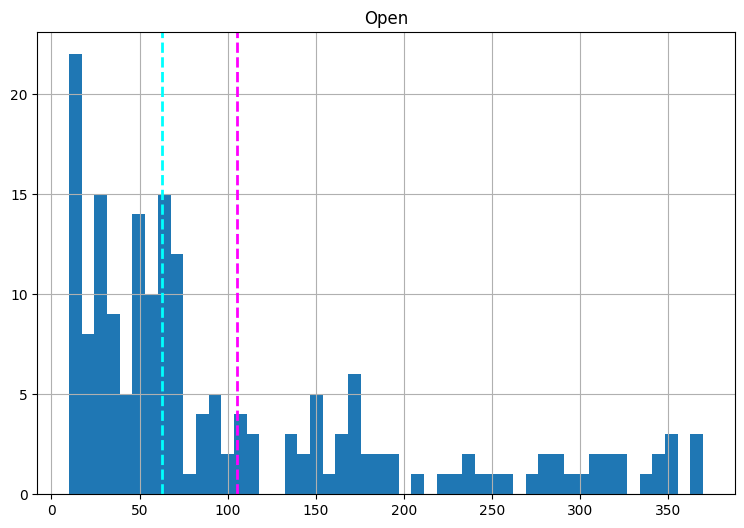

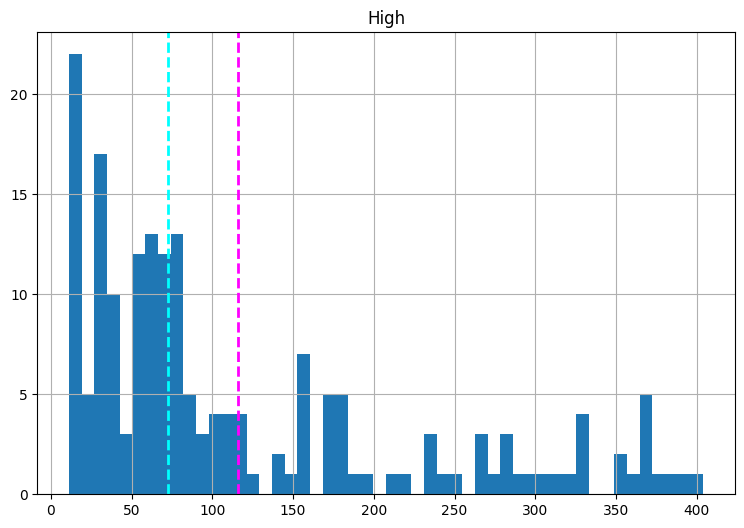

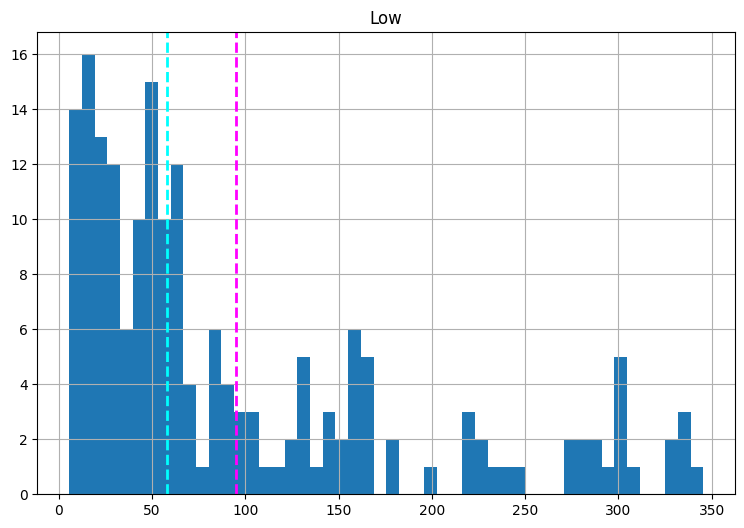

In [59]:
# Chart - 2 visualization code
# Plotting Histogram for each independent column in Data.
for col in numeric_feature[:-1]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=data[col]
  feature.hist(bins=50,ax=ax)
  ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
plt.show()

The histogram was chosen to visualize the distribution of independent variables in the Yes Bank stock closing price prediction model, as it effectively shows how data is spread. By plotting the mean and median lines, it helps in understanding the skewness of the data.


The insights from the chart reveal that the distribution of the independent variables is right-skewed. This suggests that the data is concentrated on one side of the mean, which is important for determining the appropriate statistical approach for regression analysis.

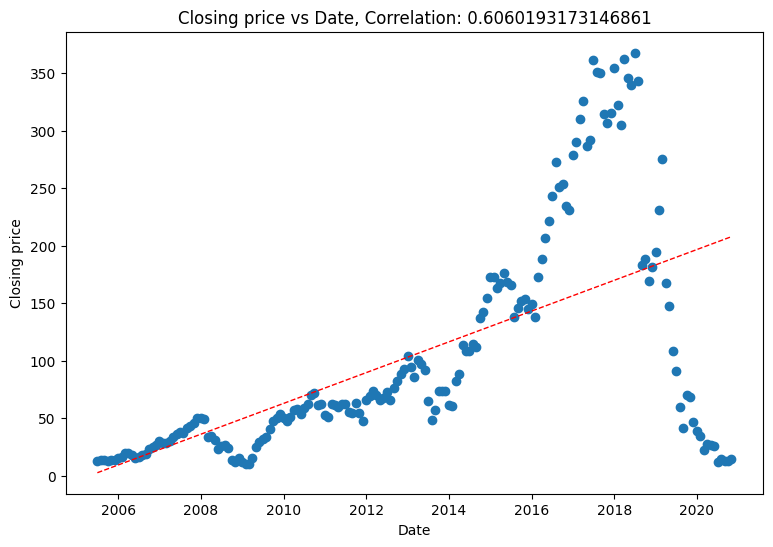

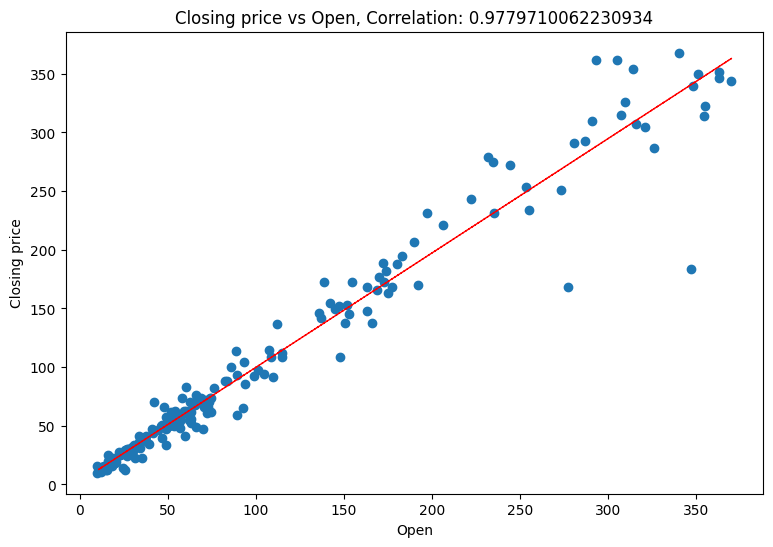

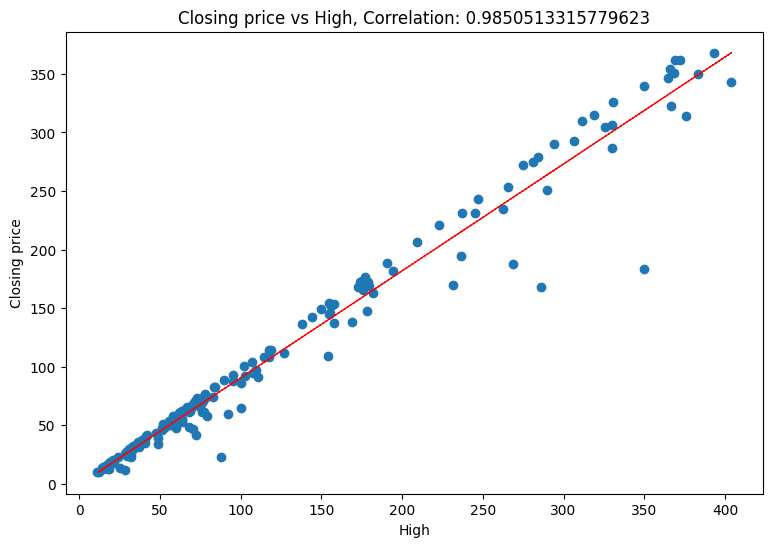

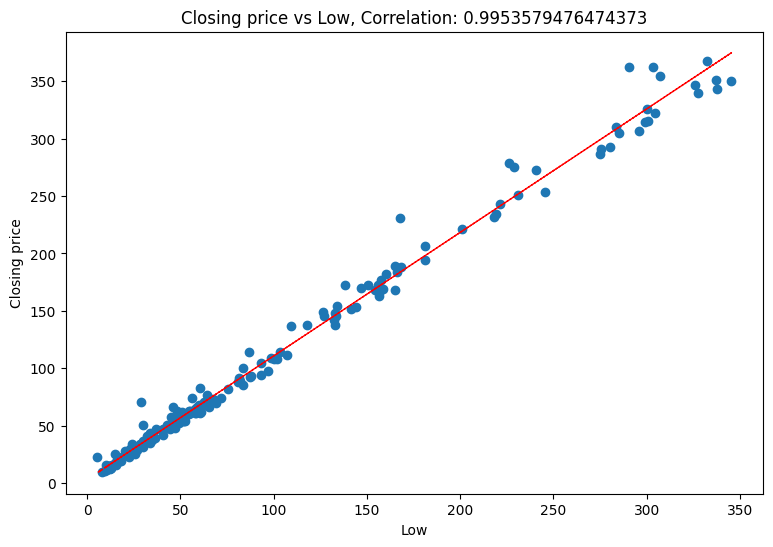

In [18]:
# Chart - 3 visualization code
# Plotting graph Independent variable vs Dependent variable to check Multicollinearity.
for col in numeric_feature[:-1]:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature=data[col]
  label=data["Close"]
  correlation=feature.corr(label)
  plt.scatter(x=feature,y=label)
  plt.ylabel("Closing price")
  plt.xlabel(col)
  ax.set_title('Closing price vs '+col+', Correlation: '+str(correlation))

  # Convert 'Date' to ordinal values for polyfit
  if col == 'Date':
    x_values = data[col].apply(lambda date: date.toordinal()).values
  else:
    x_values = data[col].values

  z=np.polyfit(x_values,data['Close'],1)
  y_hat=np.poly1d(z)(x_values)

  plt.plot(data[col],y_hat,"r--",lw=1)

plt.show()

The scatter plot was chosen to explore the relationship between the Yes Bank stock closing price and independent variables. It helps identify whether the relationship is strong or weak, and linear or nonlinear, guiding the selection of appropriate machine learning models.

The insights reveal that the independent variables are linearly correlated with the closing price, indicating potential multicollinearity. This requires selecting a model that can handle this issue effectively.

<Axes: >

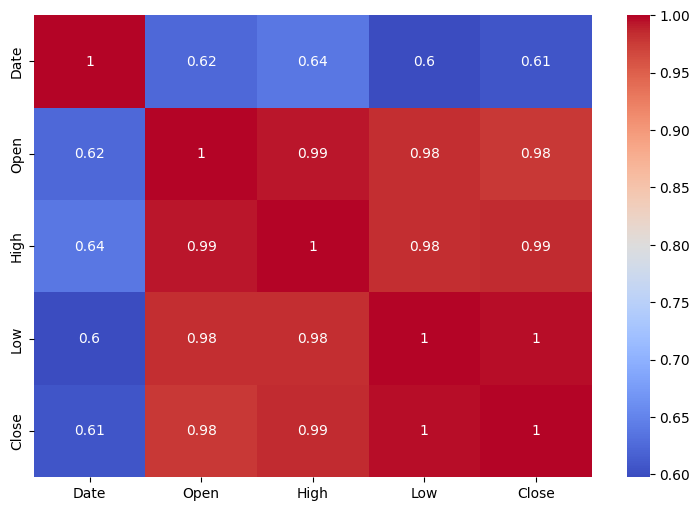

In [19]:
# Chart - 4 Correlation Heatmap visualization code
# Heatmap to see collinearity between columns
plt.figure(figsize=(9,6))
cor=data.corr()
sns.heatmap(abs(cor),annot=True,cmap='coolwarm')

The heatmap was chosen to visualize the correlation between the Yes Bank stock closing price and the independent variables. It helps identify patterns or relationships between the variables and detect potential issues like multicollinearity, which can affect the choice of machine learning models.

The insights from the heatmap reveal that the data exhibits multicollinearity, where some independent variables are highly correlated. This can cause problems, such as overfitting and unreliable coefficient estimates in models like linear regression. Identifying these correlations helps decide whether to remove variables or choose algorithms less sensitive to multicollinearity.

## ***5. Feature Engineering & Data Pre-processing***

### 1. Data Scaling

In [20]:
# Scaling your data
data_pr=data.copy() # Making of our original data
# Separate out Dependent and Independent variable
X=np.log10(data_pr.iloc[:,1:-1]) # Normalizing the data using log transformation
y=np.log10(data_pr['Close']) # Normalizing the data using log transformation


We use log transformation to scale data. Because this method applies a logarithmic transformation to the data, which can help normalize skewed data and reduce the impact of outliers.



### 2. Data Splitting

In [21]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape)
print(X_test.shape)

(148, 3)
(37, 3)


Data splitting is a common technique used in machine learning and data analysis to evaluate the performance of a model on an independent dataset. We used 80-20 split to split data.

80:20 split - In this split, the dataset is divided into two parts - training set and testing set. The training set contains 80% of the data, while the testing set contains the remaining 20% of the data. This split is commonly used when the dataset is large and the model requires significant training time. The training set is used to train the model, and the testing set is used to evaluate the model's performance.

## ***6. ML Model Implementation***

### ML Model - 1 Linear Regression

In [22]:
# ML Model - 1 Implementation
reg=LinearRegression()

# Fit the Algorithm
reg.fit(X_train,y_train)

# Predict on the model
y_pred=reg.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [23]:
# Visualizing evaluation Metric Score chart
mse=mean_squared_error(10**(y_test),10**(y_pred)) #10** to convert back log10 that we used while making it normalised
rmse=np.sqrt(mse)

r2=r2_score(10**(y_test),10**(y_pred))
Adjusted_R2=(1-(1-r2_score(10**(y_test), 10**(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

In [24]:
eval=pd.DataFrame([mse,rmse,r2,Adjusted_R2,mae],columns=['Linear'],index=['MSE','RMSE','R2','Adj R2','MAE'])
eval

,Linear
MSE,70.420406
RMSE,8.391687
R2,0.993744
Adj R2,0.993175
MAE,0.017328


### ML Model - 2.1 Linear Regression using Lasso Regularization.

In [25]:
from sklearn.linear_model import Lasso
# ML Model - 1 Implementation
lasso=Lasso(alpha=0.1)

# Fit the Algorithm
lasso.fit(X_train,y_train)

# Predict on the model
y_pred_l=lasso.predict(X_test)

In [26]:
# Visualizing evaluation Metric Score chart
mse_l=mean_squared_error(10**(y_test),10**(y_pred_l)) #10** to convert back log10 that we used while making it normalised
rmse_l=np.sqrt(mse_l)

r2_l=r2_score(10**(y_test),10**(y_pred_l))
Adjusted_R2_l=(1-(1-r2_score(10**(y_test), 10**(y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mae_l = mean_absolute_error(y_test, y_pred_l)

In [27]:
eval_l=pd.DataFrame([mse_l,rmse_l,r2,Adjusted_R2_l,mae_l],columns=['Lasso'],index=['MSE','RMSE','R2','Adj R2','MAE'])
eval=pd.concat([eval,eval_l],axis=1)


In [28]:
eval

,Linear,Lasso
MSE,70.420406,8552.042521
RMSE,8.391687,92.477254
R2,0.993744,0.993744
Adj R2,0.993175,0.171146
MAE,0.017328,0.220050


#### 2. Cross- Validation & Hyperparameter Tuning

In [29]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)

# Fit the Algorithm
lasso_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_lcv=lasso_regressor.predict(X_test)

In [30]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05}

Using  {'alpha': 1e-05}  the negative mean squared error is:  -0.001303609483074943


In [31]:
mse_lcv=mean_squared_error(10**(y_test),10**(y_pred_lcv)) #10** to convert back log10 that we used while making it normalised
rmse_lcv=np.sqrt(mse_lcv)

r2_lcv=r2_score(10**(y_test),10**(y_pred_lcv))
Adjusted_R2_lcv=(1-(1-r2_score(10**(y_test), 10**(y_pred_lcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

mae_lcv = mean_absolute_error(y_test, y_pred_lcv)

In [32]:
eval_lcv=pd.DataFrame([mse_lcv,rmse_lcv,r2_lcv,Adjusted_R2_lcv,mae_lcv],columns=['Lasso CV'],index=['MSE','RMSE','R2','Adj R2','MAE'])
eval=pd.concat([eval,eval_lcv],axis=1)

eval

,Linear,Lasso,Lasso CV
MSE,70.420406,8552.042521,70.224612
RMSE,8.391687,92.477254,8.380013
R2,0.993744,0.993744,0.993761
Adj R2,0.993175,0.171146,0.993194
MAE,0.017328,0.220050,0.017386


Here we use GridSearchCV for optimization.  GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

By looking at above Dataframe we can say that our linear regression with lasso regularization is doing better compare to all others.

### ML Model - 2.2 Ridge Regression

In [33]:
# Visualizing evaluation Metric Score chart
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(X_train,y_train)
y_pred_r=ridge.predict(X_test)


In [34]:
mse_r=mean_squared_error(10**(y_test),10**(y_pred_r))
#10** to convert back log10 that we used while making it normalised
rmse_r=np.sqrt(mse_r)

r2_r=r2_score(10**(y_test),10**(y_pred_r))
Adjusted_R2_r=1-(1-r2_score(10**(y_test), 10**(y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

from sklearn.metrics import mean_absolute_error

mae_r= mean_absolute_error(y_test, y_pred_r)

In [35]:
eval_r=pd.DataFrame([mse_r,rmse_r,r2_r,Adjusted_R2_r,mae_r],columns=['Ridge'],index=['MSE','RMSE','R2','Adj R2','MAE'])
eval=pd.concat([eval,eval_r],axis=1)

eval

,Linear,Lasso,Lasso CV,Ridge
MSE,70.420406,8552.042521,70.224612,166.335296
RMSE,8.391687,92.477254,8.380013,12.897104
R2,0.993744,0.993744,0.993761,0.985222
Adj R2,0.993175,0.171146,0.993194,0.983879
MAE,0.017328,0.220050,0.017386,0.023654


#### 2. Cross- Validation & Hyperparameter Tuning

In [36]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=3)

# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)

# Predict on the model
y_pred_rcv=ridge_regressor.predict(X_test)

In [37]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)


The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.0013085591570528889


In [38]:
mse_rcv=mean_squared_error(10**(y_test),10**(y_pred_rcv))
#10** to convert back log10 that we used while making it normalised
rmse_rcv=np.sqrt(mse_rcv)

r2_rcv=r2_score(10**(y_test),10**(y_pred_rcv))
Adjusted_R2_rcv=1-(1-r2_score(10**(y_test), 10**(y_pred_rcv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))


mae_rcv= mean_absolute_error(y_test, y_pred_rcv)


In [39]:
eval_rcv=pd.DataFrame([mse_rcv,rmse_rcv,r2_rcv,Adjusted_R2_rcv,mae_rcv],columns=['Ridge CV'],index=['MSE','RMSE','R2','Adj R2','MAE'])
eval=pd.concat([eval,eval_rcv],axis=1)


In [40]:
eval

,Linear,Lasso,Lasso CV,Ridge,Ridge CV
MSE,70.420406,8552.042521,70.224612,166.335296,69.969639
RMSE,8.391687,92.477254,8.380013,12.897104,8.364786
R2,0.993744,0.993744,0.993761,0.985222,0.993784
Adj R2,0.993175,0.171146,0.993194,0.983879,0.993219
MAE,0.017328,0.220050,0.017386,0.023654,0.017567


### ML Model - 3

In [41]:
# ML Model - 3 Implementation
from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.8)

# Fit the Algorithm
elasticnet.fit(X_train,y_train)

# Predict on the model
y_pred_e=elasticnet.predict(X_test)

In [42]:
# Visualizing evaluation Metric Score chart
mse_e=mean_squared_error(10**(y_test),10**(y_pred_e))
#10** to convert back log10 that we used while making it normalised
rmse_e=np.sqrt(mse_e)

r2_e=r2_score(10**(y_test),10**(y_pred_e))
Adjusted_R2_e=1-(1-r2_score(10**(y_test), 10**(y_pred_e)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

mae_e= mean_absolute_error(y_test, y_pred_e)

eval_e=pd.DataFrame([mse_e,rmse_e,r2_e,Adjusted_R2_e,mae_e],columns=['Elastic'],index=['MSE','RMSE','R2','Adj R2','MAE'])

eval=pd.concat([eval,eval_e],axis=1)

In [43]:
eval

,Linear,Lasso,Lasso CV,Ridge,Ridge CV,Elastic
MSE,70.420406,8552.042521,70.224612,166.335296,69.969639,7069.422528
RMSE,8.391687,92.477254,8.380013,12.897104,8.364786,84.079858
R2,0.993744,0.993744,0.993761,0.985222,0.993784,0.371936
Adj R2,0.993175,0.171146,0.993194,0.983879,0.993219,0.314840
MAE,0.017328,0.220050,0.017386,0.023654,0.017567,0.189681


#### 2. Cross- Validation & Hyperparameter Tuning

In [44]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.linear_model import ElasticNet
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)

# Fit the Algorithm
elastic_regressor.fit(X_train, y_train)

# Predict on the model
y_pred_ecv = elastic_regressor.predict(X_test)

In [45]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-05, 'l1_ratio': 0.3}

Using  {'alpha': 1e-05, 'l1_ratio': 0.3}  the negative mean squared error is:  -0.0011533635660191343


In [46]:
mse_ecv=mean_squared_error(10**(y_test),10**(y_pred_ecv))
rmse_ecv=np.sqrt(mse_ecv)

r2_ecv=r2_score(10**(y_test),10**(y_pred_ecv))
Adjusted_R2_ecv=1-(1-r2_score(10**(y_test), 10**(y_pred_ecv)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))

mae_ecv= mean_absolute_error(y_test, y_pred_ecv)

In [47]:
eval_ecv=pd.DataFrame([mse_ecv,rmse_ecv,r2_ecv,Adjusted_R2_ecv,mae_ecv],columns=['Elastic CV'],index=['MSE','RMSE','R2','Adj R2','MAE'])


In [48]:
eval=pd.concat([eval,eval_ecv],axis=1)
eval

,Linear,Lasso,Lasso CV,Ridge,Ridge CV,Elastic,Elastic CV
MSE,70.420406,8552.042521,70.224612,166.335296,69.969639,7069.422528,70.265093
RMSE,8.391687,92.477254,8.380013,12.897104,8.364786,84.079858,8.382428
R2,0.993744,0.993744,0.993761,0.985222,0.993784,0.371936,0.993757
Adj R2,0.993175,0.171146,0.993194,0.983879,0.993219,0.314840,0.993190
MAE,0.017328,0.220050,0.017386,0.023654,0.017567,0.189681,0.017371


Here we use GridSearchCV for optimization.  GridSearchCV is more likely to find the optimal set of hyperparameters if the search space is small enough, as it performs an exhaustive search.

Here we tried all the possible regularization methods, but among all Ridge CV is performing better than any other model.

Here we consider Mean Squared Error (MSE) and Adjusted R2 (Adj R2) as evalution metrics.
MSE and Adj R2 as evaluation metrics can have the following positive impacts:
1. Improved accuracy of predictions: By optimizing a model's performance based on MSE and Adj R2, businesses can improve the accuracy of their predictions. This can lead to better decision-making, improved resource allocation, and reduced costs associated with errors or inefficiencies.
2. Improved model selection: By comparing the performance of different models based on MSE and Adj R2, businesses can select the best model for their specific problem. This can lead to improved performance and better outcomes for the business.

Overall, using MSE and Adj R2 as evaluation metrics can help businesses improve the accuracy of their predictions, gain insights into their data and make better decisions.


So as we decided our evalution metrics as MSE and Adj R2, On the basis of it we choosed our ML model as Ridge CV.

Ridge regression can help to improve the generalization performance of a model by reducing the impact of multicollinearity and high-dimensional data. However, the choice of the regularization parameter alpha can have a significant impact on the performance of the model.

we choose RidgeCV to estimate the optimal value of the regularization parameter alpha and to ensure that our model is less likely to overfit the training data. By using cross-validation to estimate the optimal value of alpha, we can build a more robust and generalizable model that can perform well on new data.


####Ridge CV

In [49]:
best_model=Ridge(alpha=0.01) # RidgeCV Model after Hyperparameter tunning

In [50]:
best_model.fit(X_train,y_train) # fit a data into model

Ridge(alpha=0.01)

In [51]:
X_train.head()

,Open,High,Low
113,2.152533,2.190332,2.127105
8,1.209515,1.321184,1.204663
96,1.965672,2.001734,1.761251
170,1.774517,1.860637,1.612254
45,1.001734,1.243286,0.997386


As we take our best performing model as RidgeCV. On the basis of our Hyperparameter Tunning we get our Alpha as 0.01. here we are gonna check feature importance with two methods are as follows:
 Coefficient : By looking at the coefficient of model we can say that High has most impact on target variable where as Open has negative correlation with target variable

## ***7.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a joblib file format for deployment process.


In [57]:
# Save the File
import joblib
joblib.dump(best_model, 'best_model.joblib') # saving are best model in joblib file

['best_model.joblib']

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [58]:
# Load the File and predict unseen data.
model = joblib.load('best_model.joblib')

model.predict(X_test)

array([1.49281821, 2.1460464 , 1.67820951, 2.14246687, 1.82078283,
       1.50592846, 2.36237019, 1.21581071, 1.13812524, 2.34689825,
       2.47580699, 1.95136563, 2.1784055 , 1.76583469, 2.52555747,
       2.42499701, 1.86105797, 1.44089765, 2.42766349, 1.70736326,
       0.97288958, 2.07250228, 2.17892937, 1.76813804, 2.33331037,
       1.71279947, 2.40565057, 1.1239751 , 2.02918406, 1.72541452,
       2.5712468 , 2.54678161, 1.86589544, 2.22259265, 1.59034463,
       1.67605547, 2.41074454])

# **Conclusion**

After making model on Yes bank Stock Closing price predication, we want to conclude that Data has multicollinearity. So for dealing with it we preferred to go for different regularization techniques with cross validation. We made every possible model then on the basis of Mean Squared Error (MSE) and Adjusted R2 (Adj r2) we can see our best performing model is RidgeCV with minimal error. With respective model we tried to do some feature importance for model, Where we find out that High is most impacting feature for target variable also Open is negativley impacting the target variable.